AIS039_Jai Rajkumar Mane

# Multiple Linear Regression using House price prediction data

# MODEL 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
data=pd.read_csv("C:\\Users\\DeLL\\Desktop\\Internship\\house_price.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
#Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 557.1+ KB


In [4]:
#Describe data
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


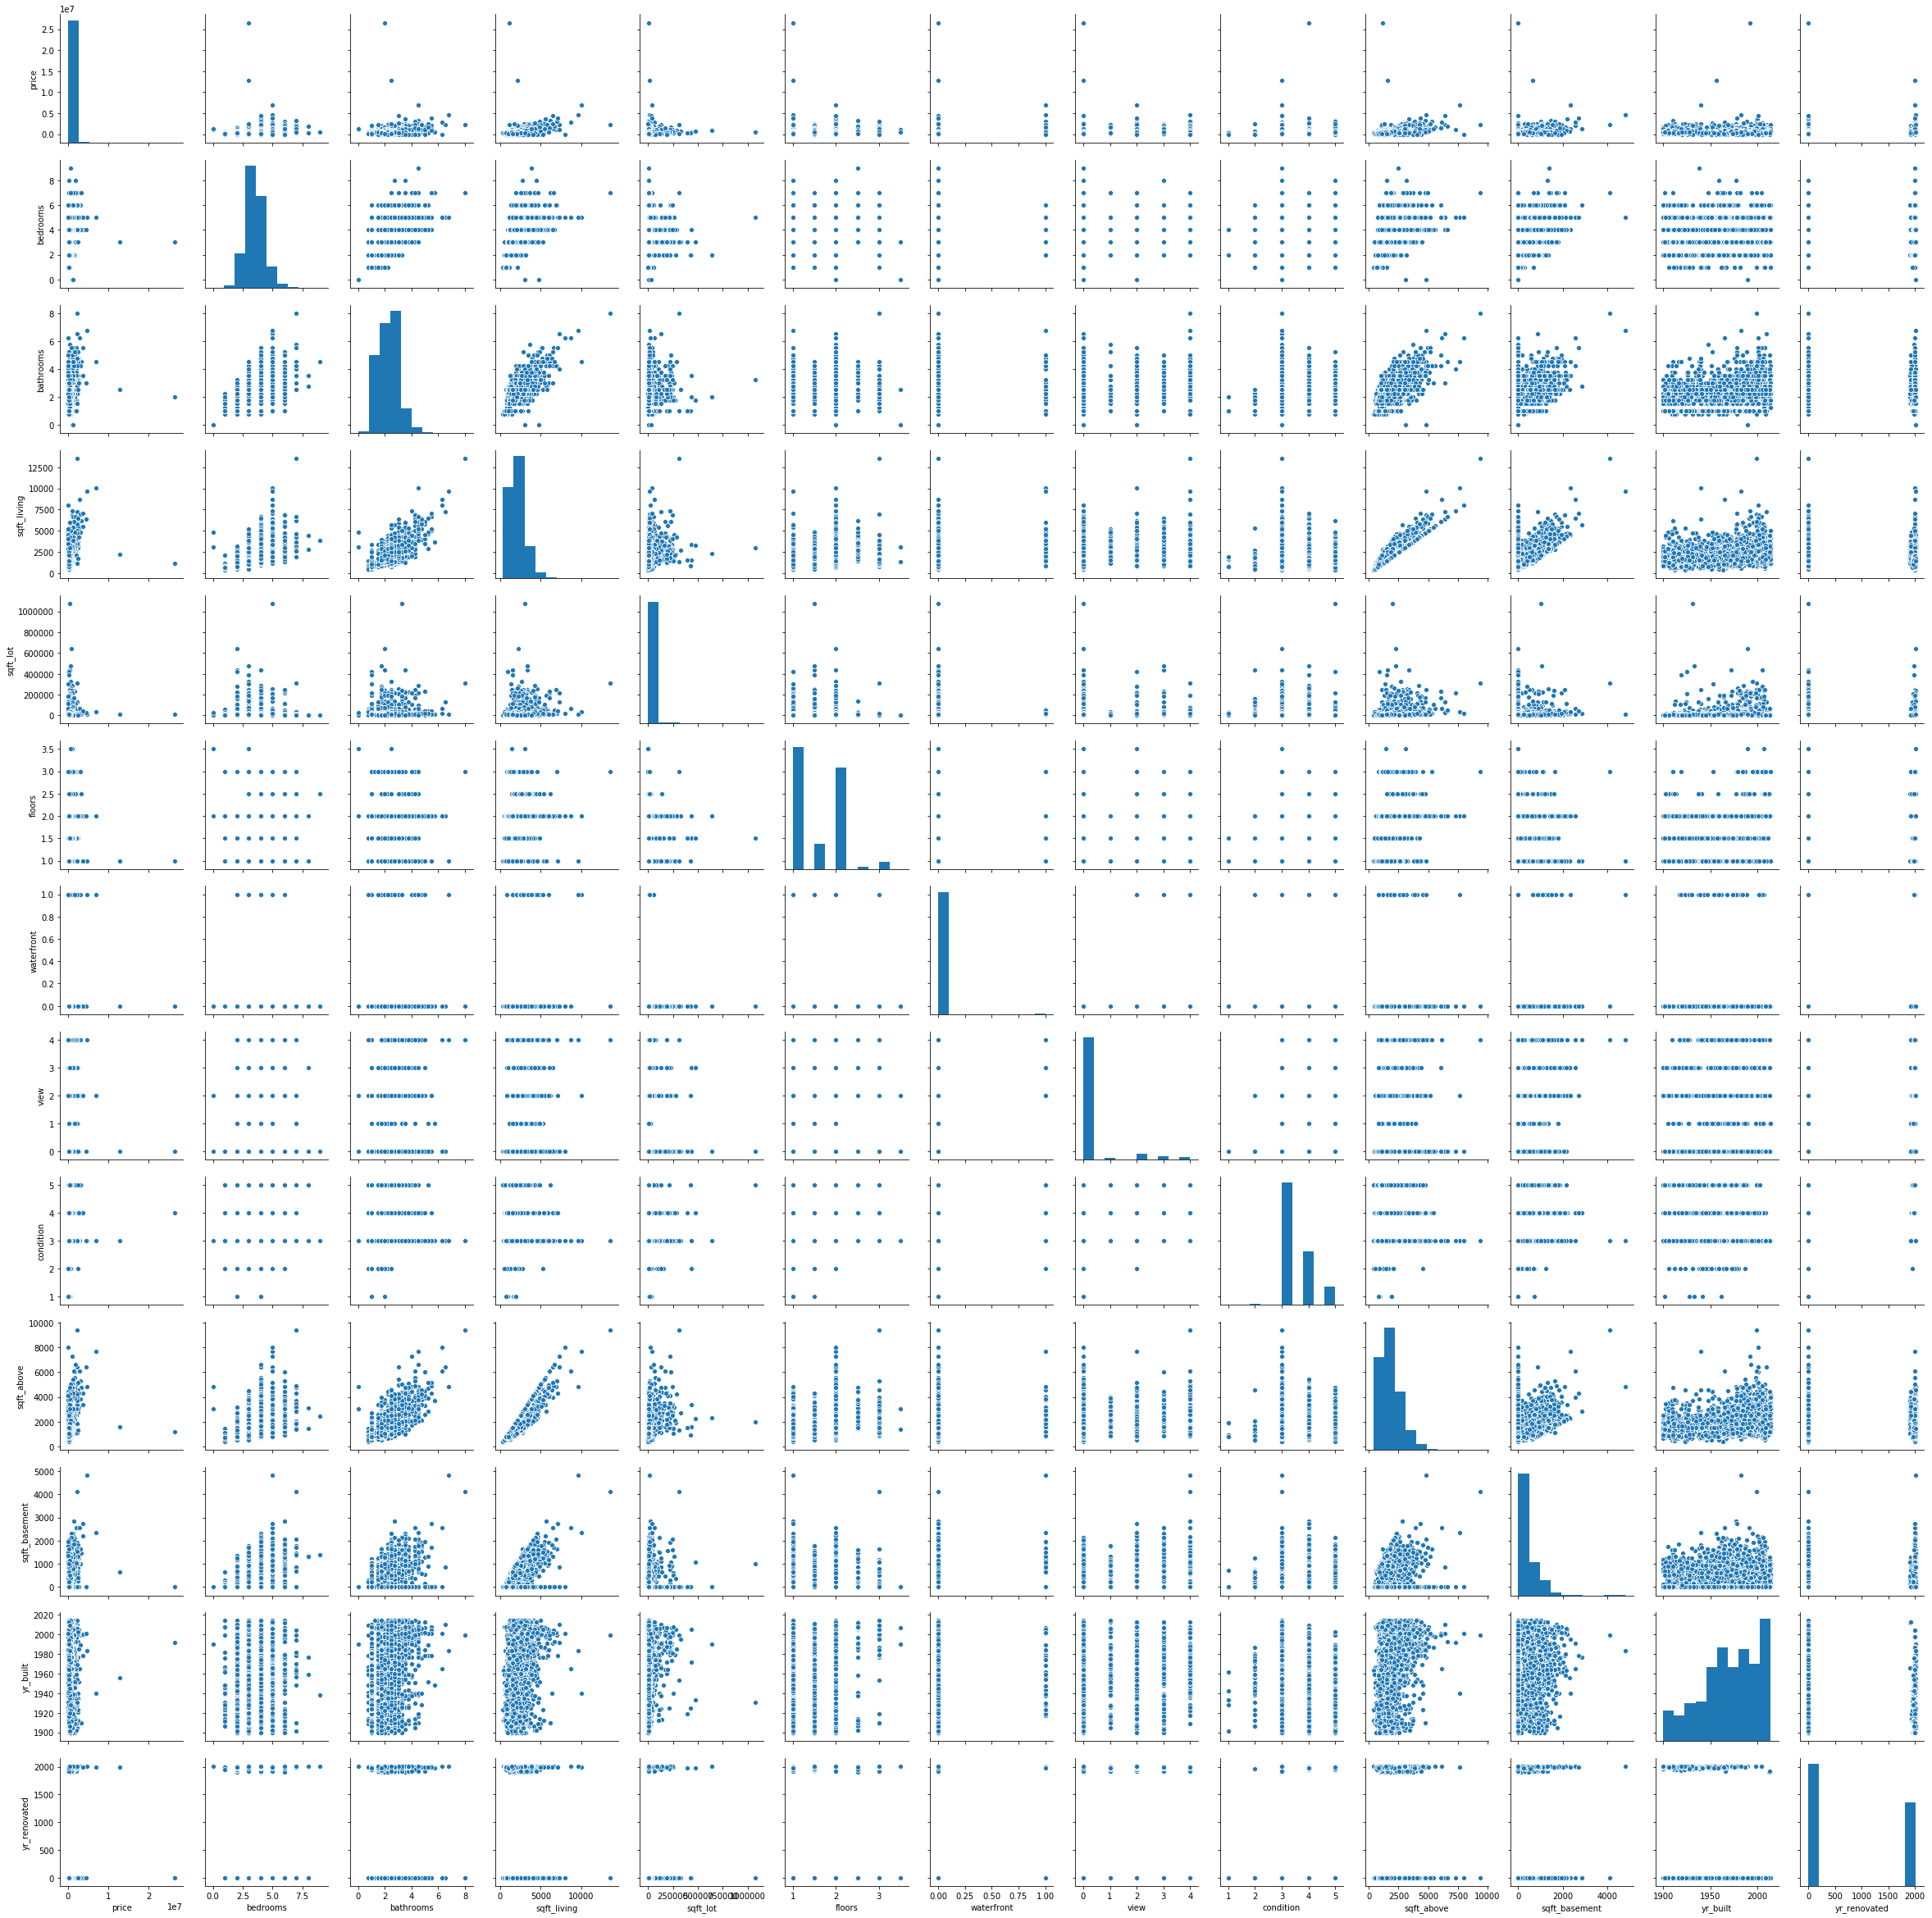

In [5]:
#pairplot
sns.pairplot(data)

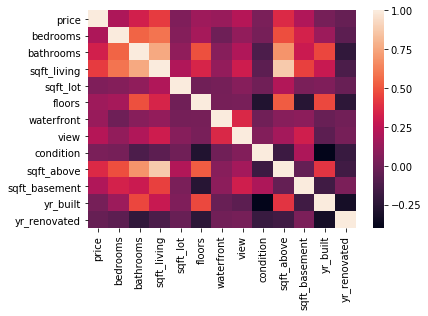

In [6]:
#correlation matrix
sns.heatmap(data.corr())

Model with 1 independent variable(i.e. sqft_living)

In [7]:
x=data[['sqft_living']].values.reshape(-1,1)  #independent
y=data.iloc[:,1:2].values.reshape(-1,1)  #dependent

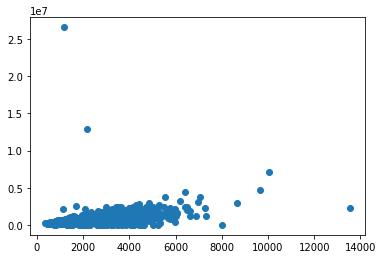

In [8]:
plt.scatter(x,y)

In [9]:
# split train test dataset 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_train.shape)
print(x_test.shape)

(3220, 1)
(1380, 1)


In [10]:
#Model fitting
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# intercept , coefficient term
print("Intercept term : ",lm.intercept_)
print("coefficient term : ",lm.coef_)

Intercept term :  [23396.21890958]
coefficient term :  [[249.28812701]]


Fitted model is given as  price = 23396.21890958 + 249.28812701 sqft_living


Interpretation: 


If sqft_living is increases by 1 unit then mean change in price is increases by 249.28812701 units, when all other regressors are held constant at same level.

In [12]:
# Prediction
y_pred=lm.predict(x_test);y_pred

array([[1377030.74857878],
       [ 589280.26722433],
       [ 539422.64182215],
       ...,
       [ 417271.4595868 ],
       [ 310077.56497212],
       [ 270191.46465037]])

In [13]:
# MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
MSE1=sqrt(mean_squared_error(y_test,y_pred))
RMSE1=sqrt(MSE1)
print("MSE1: ",MSE1)
print("RMSE1: ",RMSE1)

MSE1:  434821.16126118635
RMSE1:  659.4097066780155


# MODEL 2

Model with 1+2 independent variable(i.e. bathrooms,sqft_living,sqft_above)

In [14]:
x=data[['bathrooms','sqft_living','sqft_above']]  #independent
y=data.iloc[:,1:2] #dependent

In [15]:
# split train test dataset 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_train.head())
print(x_train.shape)
print(x_test.shape)

      bathrooms  sqft_living  sqft_above
2195       1.50         1290        1290
631        1.00         1700        1700
3670       2.50         2600        2600
1958       2.00         1680        1680
3284       3.25         4250        4250
(3220, 3)
(1380, 3)


In [16]:
#Model fitting
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# intercept , coefficient term
print("Intercept term : ",lm.intercept_)
print("coefficient term : ",lm.coef_)

Intercept term :  [23402.10503215]
coefficient term :  [[3125.33694241  260.40029268  -16.73371379]]


Fitted model is given as  price =23402.10503215 + 3125.33694241 bathrooms + 260.40029268 sqft_living - 16.73371379 sqft_above

Interpretation: 

If bathrooms is increases by 1 unit then mean change in price is increases by 3125.33694241 units, when all other regressors are held constant at same level.

If sqft_living is increases by 1 unit then mean change in price is increases by 260.40029268 units, when all other regressors are held constant at same level.

If sqft_above is increases by 1 unit then mean change in price is decreases by 16.73371379  units, when all other regressors are held constant at same level.

In [18]:
# Prediction
y_pred=lm.predict(x_test);y_pred

array([[1355887.63921434],
       [ 598450.2525026 ],
       [ 535605.26568371],
       ...,
       [ 413864.6393224 ],
       [ 309869.34463671],
       [ 267757.35507243]])

In [22]:
# MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
MSE2=sqrt(mean_squared_error(y_test,y_pred))
RMSE2=sqrt(MSE2)
print("MSE2: ",MSE2)
print("RMSE2: ",RMSE2)

MSE2:  434543.9709133382
RMSE2:  659.1994925008197


# MODEL 3

Model with 3+2 independent variable(i.e. bathrooms,sqft_living,sqft_above, view , condition)

In [23]:
x=data[['bathrooms','sqft_living','sqft_above','view','condition']]  #independent
y=data.iloc[:,1:2] #dependent

In [24]:
# split train test dataset 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_train.head())
print(x_train.shape)
print(x_test.shape)

      bathrooms  sqft_living  sqft_above  view  condition
2195       1.50         1290        1290     0          3
631        1.00         1700        1700     0          4
3670       2.50         2600        2600     0          3
1958       2.00         1680        1680     0          3
3284       3.25         4250        4250     0          3
(3220, 5)
(1380, 5)


In [25]:
#Model fitting
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
# intercept , coefficient term
print("Intercept term : ",lm.intercept_)
print("coefficient term : ",lm.coef_)

Intercept term :  [-178441.49042389]
coefficient term :  [[1.17408936e+04 1.94945278e+02 3.72102616e+01 8.00376668e+04
  5.95531644e+04]]


Fitted model is given as  price =-178441.49042389 + 1.17408936e+04 bathrooms + 194.945278 sqft_living +37.2102616 sqft_above +5.95531644e+04 view +5.95531644e+04 condition

Interpretation: 

If bathrooms is increases by 1 unit then mean change in price is increases by 1.17408936e+04 units, when all other regressors are held constant at same level.

If sqft_living is increases by 1 unit then mean change in price is increases by 1.94945278e+02 units, when all other regressors are held constant at same level.

If sqft_above is increases by 1 unit then mean change in price is increases by 3.72102616e+01  units, when all other regressors are held constant at same level.

If view is increases by 1 unit then mean change in price is increases by 5.95531644e+04  units, when all other regressors are held constant at same level.

If condition is increases by 1 unit then mean change in price is increases by 5.95531644e+04  units, when all other regressors are held constant at same level.

In [27]:
# Prediction
y_pred=lm.predict(x_test);y_pred

array([[1355598.42735072],
       [ 520510.95521054],
       [ 510132.20358987],
       ...,
       [ 447123.48346312],
       [ 350231.8249138 ],
       [ 301346.04496569]])

In [28]:
# MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
MSE3=sqrt(mean_squared_error(y_test,y_pred))
RMSE3=sqrt(MSE3)
print("MSE3: ",MSE3)
print("RMSE3: ",RMSE3)

MSE3:  432927.1737174025
RMSE3:  657.9720159075175


In [29]:
print("Interpretation using Mean Square Error : ")
if MSE1<MSE2 and MSE1<MSE3:
    print("MODEL 1 is preferable for further analysis.")
elif MSE2<MSE1 and MSE2<MSE3:
    print("MODEL 2 is preferable for further analysis.")
elif MSE3<MSE1 and MSE3<MSE1:
    print("MODEL 3 is preferable for further analysis.")
        


Interpretation using Mean Square Error : 
MODEL 3 is preferable for further analysis.


Thus, we can prefers the model which gives smaller mean square error.

price =-178441.49042389 + 1.17408936e+04 bathrooms + 194.945278 sqft_living +37.2102616 sqft_above +5.95531644e+04 view +5.95531644e+04 condition
